In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=30)

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    harmony, _ = librosa.effects.hpss(y)
    perceptr = librosa.feature.spectral_flatness(y=y)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    features = {
        'chroma_stft_mean': np.mean(chroma_stft),
        'chroma_stft_var': np.var(chroma_stft),
        'rms_mean': np.mean(rms),
        'rms_var': np.var(rms),
        'spectral_centroid_mean': np.mean(spectral_centroid),
        'spectral_centroid_var': np.var(spectral_centroid),
        'spectral_bandwidth_mean': np.mean(spectral_bandwidth),
        'spectral_bandwidth_var': np.var(spectral_bandwidth),
        'rolloff_mean': np.mean(rolloff),
        'rolloff_var': np.var(rolloff),
        'zero_crossing_rate_mean': np.mean(zero_crossing_rate),
        'zero_crossing_rate_var': np.var(zero_crossing_rate),
        'harmony_mean': np.mean(harmony),
        'harmony_var': np.var(harmony),
        'perceptr_mean': np.mean(perceptr),
        'perceptr_var': np.var(perceptr),
        'tempo': tempo
    }

    for i in range(1, 21):
        features[f'mfcc{i}_mean'] = np.mean(mfcc[i-1])
        features[f'mfcc{i}_var'] = np.var(mfcc[i-1])

    return features

def extract_features_from_directory(base_dir):
    features_list = []

    for genre in os.listdir(base_dir):
        genre_dir = os.path.join(base_dir, genre)
        if os.path.isdir(genre_dir):
            for filename in os.listdir(genre_dir):
                if filename.endswith('.wav'):
                    file_path = os.path.join(genre_dir, filename)
                    try:
                        features = extract_features(file_path)
                        features['filename'] = filename
                        features['label'] = genre
                        features_list.append(features)
                    except Exception as e:
                        print(f"Hata oluştu: {file_path} -> {e}")

    return pd.DataFrame(features_list)

base_dir = '/content/drive/MyDrive/CS552_Project/Data/genres_original'
df = extract_features_from_directory(base_dir)

df.head()

KeyboardInterrupt: 

In [ ]:
csv_save_path = '/content/drive/MyDrive/CS552_Project/Data/features_extracted.csv'
df.to_csv(csv_save_path, index=False)

print(f"CSV dosyası başarıyla kaydedildi: {csv_save_path}")


CSV dosyası başarıyla kaydedildi: /content/drive/MyDrive/CS552_Project/Data/features_extracted.csv


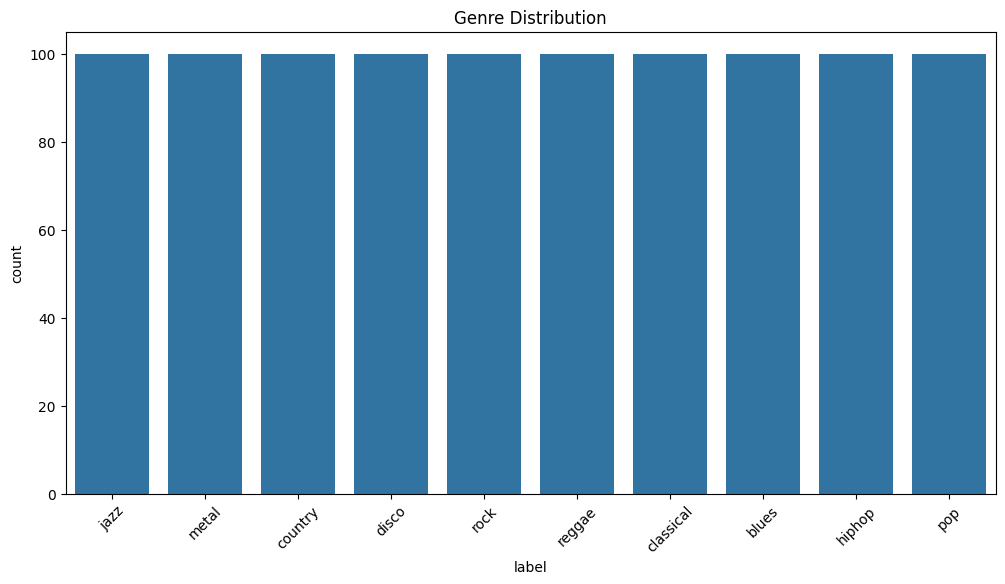

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='label', data=df)
plt.xticks(rotation=45)
plt.title('Genre Distribution')
plt.show()

In [ ]:
df.columns

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'filename', 'labe

In [ ]:
tmp = df.groupby('label').agg(
    tempo_mean=('tempo', lambda x: np.mean([v if not isinstance(v, list) else v[0] for v in x])),
    chroma_stft_mean=('chroma_stft_mean', 'mean'),
    rms_mean=('rms_mean', 'mean'),
    spectral_bandwidth_mean=('spectral_bandwidth_mean', 'mean'),
    rolloff_mean=('rolloff_mean', 'mean'),
    zero_crossing_rate_mean=('zero_crossing_rate_mean', 'mean'),
    harmony_mean=('harmony_mean', 'mean'),
    perceptr_mean=('perceptr_mean', 'mean')
)
tmp



,tempo_mean,chroma_stft_mean,rms_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean
label,,,,,,,,
blues,120.781960,0.341497,0.136008,1931.360930,3637.204673,0.078983,-0.000458,0.003592
classical,126.455886,0.263606,0.042940,1521.891093,2482.809237,0.077636,-0.000246,0.002296
country,110.858840,0.343777,0.125932,2099.527275,3949.478618,0.083407,-0.000014,0.013278
disco,120.341798,0.415693,0.136252,2513.465248,5520.282536,0.129404,-0.000253,0.032884
hiphop,113.976295,0.454302,0.178212,2513.575335,5334.097201,0.108005,-0.000185,0.030877
jazz,114.745011,0.296968,0.086299,2018.605163,3752.476309,0.077126,-0.000727,0.009983
metal,124.873912,0.479248,0.153410,2242.527088,5125.259175,0.147506,-0.000575,0.018587
pop,112.759957,0.397657,0.199649,3008.285076,6655.214340,0.133610,0.000014,0.059063
reggae,129.364182,0.408219,0.122453,2311.578772,4594.498051,0.091594,-0.000760,0.025301


🎯 Adım Adım Yorum:
1. 🎵 Tempo (BPM)
Reggae en hızlı tempo ortalamasına sahip (129 BPM).

Classical da yüksek tempolu (126 BPM), bu ilginç, çünkü klasik müzik genelde çok tempolu değildir → Belki dataset içinde hızlı klasik eserler fazladır.

Country en düşük tempo ortalamasına sahip (110 BPM civarı).

Genel olarak, türler 110–130 BPM aralığında.

✅ Tempo tür ayırt etmede kullanılabilir bir özellik.

2. 🎼 Chroma_stft_mean (Ton yoğunluğu)
Metal ve HipHop türleri en yüksek chroma yoğunluğuna sahip (~0.48, ~0.45).

Classical müzikte chroma değeri en düşük (~0.26).

Yani, metal ve hiphop türleri tonal olarak daha yoğun, klasik müzik ise daha düşük ton yoğunluğuna sahip.

✅ Chroma_stft_mean harmonik yoğunlukları ayırt etmekte işe yarar.

3. 📈 RMS_mean (Enerji seviyesi)
Pop şarkılarının ortalama enerjisi en yüksek (~0.20).

Classical müzik ise en düşük enerjiye sahip (~0.043).

HipHop da yüksek enerji taşıyor (~0.178).

✅ Enerji (RMS) değerleri, özellikle pop, hiphop gibi türleri klasik müzikten ayırmada etkili olacak.

4. 🎙️ Spectral_bandwidth_mean (Spektral genişlik)
Pop müzikte spektral genişlik en fazla (~3008 Hz).

Classical müzik en düşük (~1521 Hz).

Bu, pop şarkıların daha "parlak", klasik şarkıların daha "yumuşak" olduğunu gösteriyor.

✅ Spektral genişlik sesin parlaklığı/hafifliği için çok kritik bir ayrım.

5. 🎸 Rolloff_mean (Spektral Rolloff)
Pop ve Disco yüksek rolloff değerlerine sahip (~6655, ~5520).

Classical ve Blues düşük rolloff gösteriyor.

Yani pop ve disco daha fazla yüksek frekanslı içeriğe sahip (daha tiz, parlak).

6. 🔊 Zero_crossing_rate_mean (Sinyal değişim sıklığı)
Metal türünde zero crossing rate çok yüksek (~0.147).

Classical ve Jazz gibi türlerde daha düşük (~0.077 civarı).

Metal müzikte sinyal daha "karmaşık", yani daha çok pozitif-negatif sıçrama var (agresif, distortion etkisi).

✅ Zero crossing rate, metal vs klasik ayrımında iyi çalışır.

7. 🎼 Harmony_mean
Bütün türlerde harmony_mean sıfıra yakın.

Büyük bir ayrım yok, ama Jazz ve Reggae türlerinde biraz daha negatif harmony ortalamaları var.

8. 🎵 Perceptr_mean (Spectral flatness)
Pop müzik en yüksek spectral flatness değerine sahip (~0.059).

Classical müzik oldukça düşük (~0.0023).

Spectral flatness, bir sesin tonal mi yoksa gürültülü mü olduğunu ölçer:

Yüksek flatness → Gürültülü, az tonal (pop, hiphop gibi).

Düşük flatness → Tonal, harmonik (classical gibi).

✅ Özellikle perceptr_mean ile klasik müzik ve pop/hiphop arasında büyük ayrım yapılabilir.



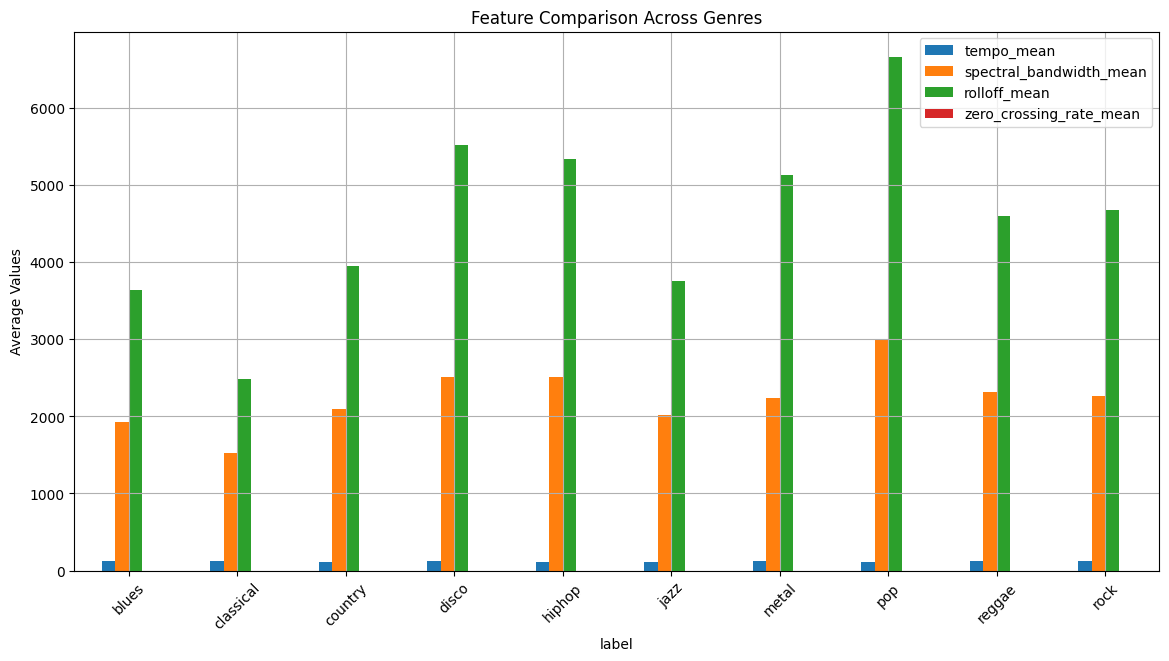

In [ ]:
ax = tmp[['tempo_mean', 'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean']].plot(
    kind='bar',
    figsize=(14,7)
)
plt.title('Feature Comparison Across Genres')
plt.ylabel('Average Values')
plt.xticks(ticks=np.arange(len(tmp.index)), labels=tmp.index, rotation=45)
plt.grid()
plt.show()


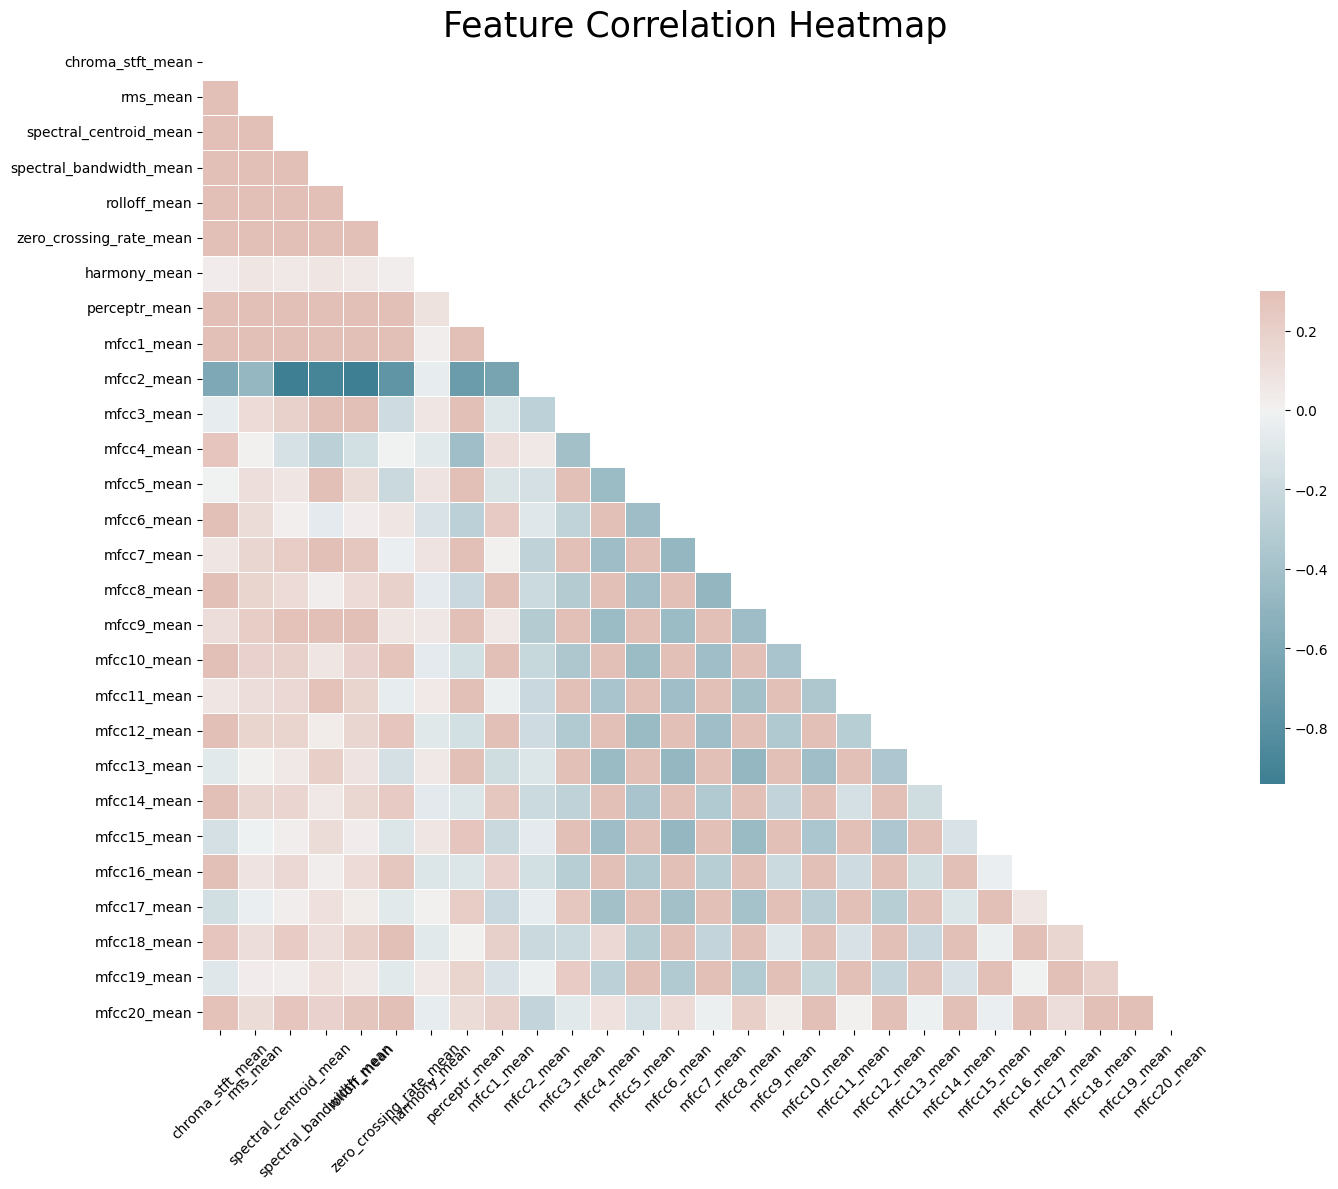

In [ ]:
selected_features = df.filter(regex='mean').columns.tolist()

correlation_matrix = df[selected_features].corr()

upper_triangle_mask = np.triu(np.ones(correlation_matrix.shape, dtype=bool))

plt.figure(figsize=(16, 12))
color_palette = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(
    correlation_matrix,
    mask=upper_triangle_mask,
    cmap=color_palette,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)

plt.title('Feature Correlation Heatmap', fontsize=25)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


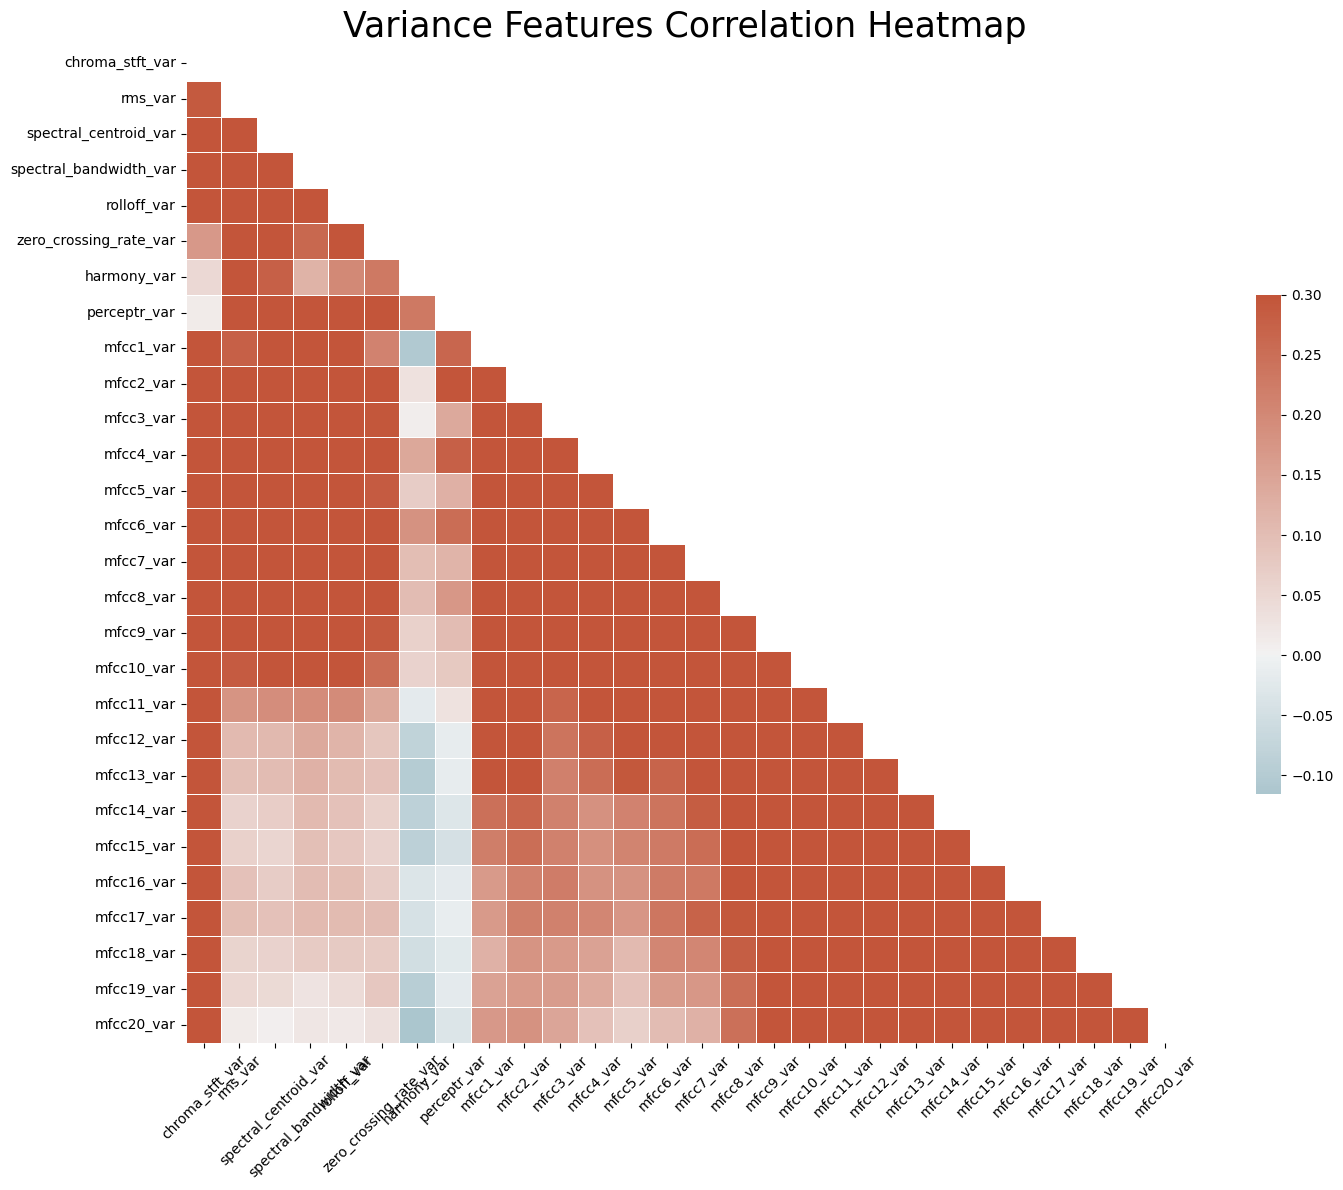

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

selected_var_features = df.filter(regex='var').columns.tolist()

corr_matrix_var = df[selected_var_features].corr()

upper_mask = np.triu(np.ones_like(corr_matrix_var, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix_var,
    mask=upper_mask,
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)

plt.title('Variance Features Correlation Heatmap', fontsize=25)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


📋 Görsel Yorum: Genel olarak çok koyu kırmızı bir harita görüyoruz.

Bu, özellikler arasında ciddi bir korelasyon olmadığını gösteriyor (sadece 0.2–0.3 civarında pozitif korelasyonlar var).

Isı haritasında beyaz ve mavi tonlar (negatif korelasyon) çok az.

perceptr_var ve mfcc2_var gibi birkaç özellik diğerlerine göre hafif farklılaşıyor (maviye yakın).

MFCC varyansları kendi aralarında çok güçlü bir korelasyon sergilemiyor, bu da iyi haber.

Çünkü çok yüksek korelasyon olsaydı, redundant (fazla) bilgi taşırdı ve modele zarar verirdi.

Length yine diğer özelliklerle çok zayıf bir korelasyona sahip (beyaza yakın).

In [ ]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
chroma_stft_mean,1000.0,NaN,NaN,NaN,0.37873,0.081669,0.17177,0.319462,0.383055,0.435605,0.663541
chroma_stft_var,1000.0,NaN,NaN,NaN,0.086352,0.007742,0.044578,0.082319,0.086622,0.091256,0.108048
rms_mean,1000.0,NaN,NaN,NaN,0.130842,0.065651,0.00527,0.086586,0.122397,0.175723,0.397851
rms_var,1000.0,NaN,NaN,NaN,0.00305,0.003635,0.000004,0.00094,0.001822,0.003583,0.027708
spectral_centroid_mean,1000.0,NaN,NaN,NaN,2202.043603,715.848608,570.150688,1628.001256,2209.457924,2691.9435,4434.948743
spectral_centroid_var,1000.0,NaN,NaN,NaN,469646.52235,400742.30168,7957.772931,184654.530026,338675.924746,612234.709717,3035513.623361
spectral_bandwidth_mean,1000.0,NaN,NaN,NaN,2242.36714,526.434628,899.979779,1905.823285,2221.382901,2578.518764,3509.582338
spectral_bandwidth_var,1000.0,NaN,NaN,NaN,136870.594045,96487.498916,11160.012397,67245.523825,111890.283495,182132.935029,695146.000568
rolloff_mean,1000.0,NaN,NaN,NaN,4572.062766,1574.567284,749.528801,3381.008722,4658.484331,5534.110286,8676.447535
rolloff_var,1000.0,NaN,NaN,NaN,1842424.233827,1425088.904442,14807.539254,772027.295559,1471814.624042,2555821.396266,8661012.062648


In [ ]:
df.isnull().sum()


,0
chroma_stft_mean,0
chroma_stft_var,0
rms_mean,0
rms_var,0
spectral_centroid_mean,0
spectral_centroid_var,0
spectral_bandwidth_mean,0
spectral_bandwidth_var,0
rolloff_mean,0
rolloff_var,0


In [ ]:
df.isna().sum()#nan varmı baktık


,0
chroma_stft_mean,0
chroma_stft_var,0
rms_mean,0
rms_var,0
spectral_centroid_mean,0
spectral_centroid_var,0
spectral_bandwidth_mean,0
spectral_bandwidth_var,0
rolloff_mean,0
rolloff_var,0


**KNN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df.drop(columns=['filename', 'label', 'tempo'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for k_values in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k_values)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)
    print(f"K değeri: {k_values}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


K değeri: 1
Accuracy: 0.705

Classification Report:
               precision    recall  f1-score   support

       blues       0.72      0.65      0.68        20
   classical       0.80      1.00      0.89        20
     country       0.55      0.85      0.67        20
       disco       0.58      0.75      0.65        20
      hiphop       0.75      0.60      0.67        20
        jazz       0.91      0.50      0.65        20
       metal       0.78      0.70      0.74        20
         pop       0.94      0.85      0.89        20
      reggae       0.59      0.50      0.54        20
        rock       0.65      0.65      0.65        20

    accuracy                           0.70       200
   macro avg       0.73      0.71      0.70       200
weighted avg       0.73      0.70      0.70       200


Confusion Matrix:
 [[13  0  4  0  0  1  2  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  1 17  0  0  0  0  0  2  0]
 [ 0  0  2 15  0  0  0  0  0  3]
 [ 0  0  0  3 12  0  1  0  3  1]
 [ 

**Random** **Forest**

Random Forest Accuracy: 0.71

Classification Report:
               precision    recall  f1-score   support

       blues       0.81      0.65      0.72        20
   classical       0.83      1.00      0.91        20
     country       0.65      0.65      0.65        20
       disco       0.50      0.55      0.52        20
      hiphop       0.71      0.60      0.65        20
        jazz       0.80      0.80      0.80        20
       metal       0.75      0.90      0.82        20
         pop       0.89      0.85      0.87        20
      reggae       0.50      0.55      0.52        20
        rock       0.69      0.55      0.61        20

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



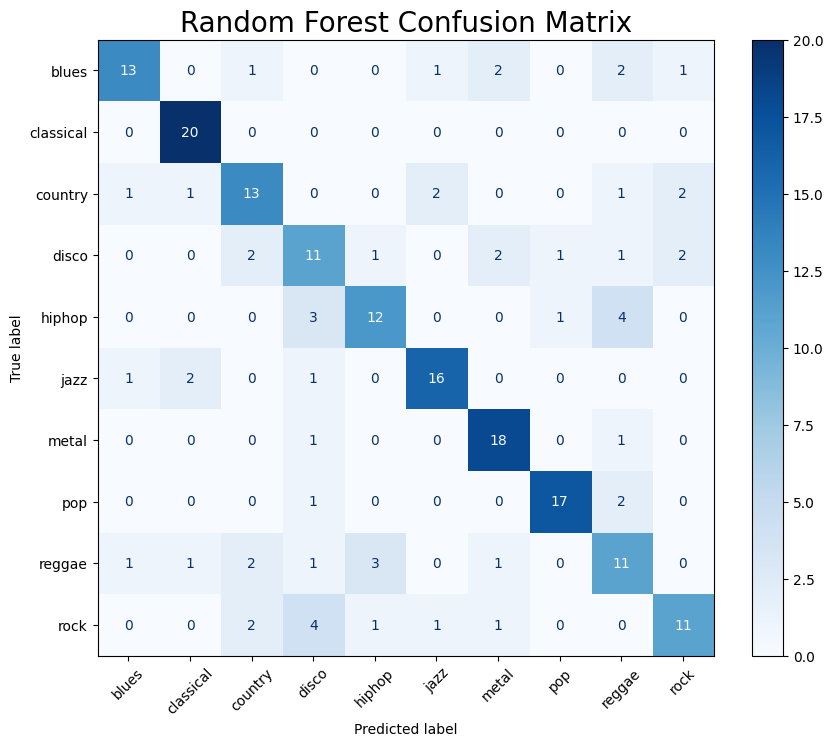

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)


rf_model.fit(X_train_scaled, y_train)


y_pred_rf = rf_model.predict(X_test_scaled)


print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test, cmap='Blues', ax=ax)
plt.title("Random Forest Confusion Matrix", fontsize=20)
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk skoru:", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
En iyi parametreler: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
En iyi doğruluk skoru: 0.68125


Test Set Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

       blues       0.83      0.75      0.79        20
   classical       0.80      1.00      0.89        20
     country       0.68      0.65      0.67        20
       disco       0.55      0.60      0.57        20
      hiphop       0.76      0.65      0.70        20
        jazz       0.82      0.70      0.76        20
       metal       0.75      0.90      0.82        20
         pop       0.86      0.90      0.88        20
      reggae       0.57      0.60      0.59        20
        rock       0.69      0.55      0.61        20

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



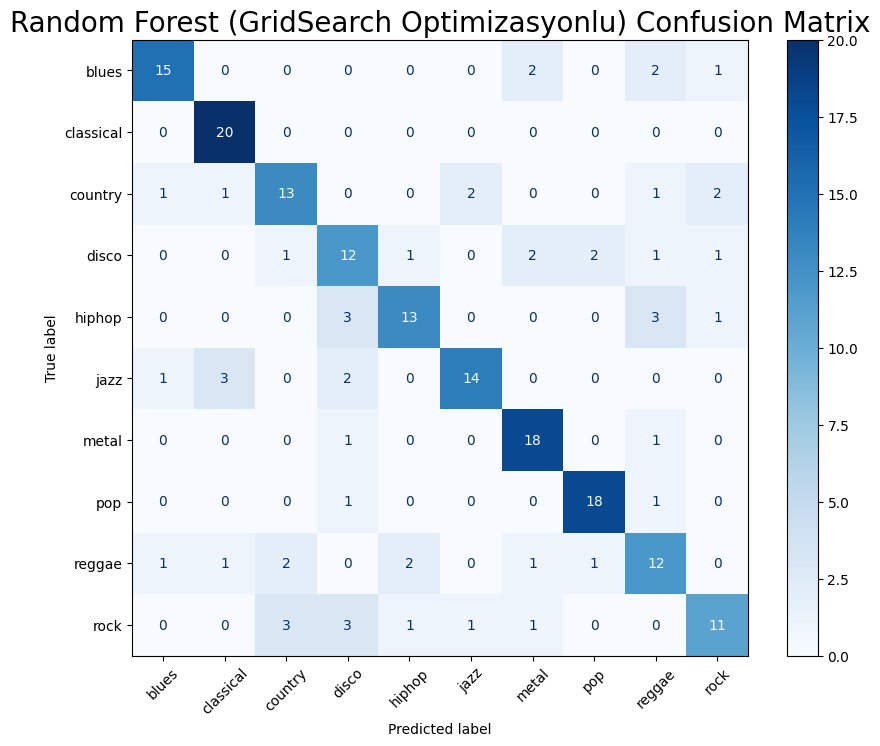

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

print("Test Set Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))


fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(best_rf, X_test_scaled, y_test, cmap='Blues', ax=ax)
plt.title("Random Forest (GridSearch Optimizasyonlu) Confusion Matrix", fontsize=20)
plt.xticks(rotation=45)
plt.show()


<ipython-input-29-6aa1b2bf1ce3>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')


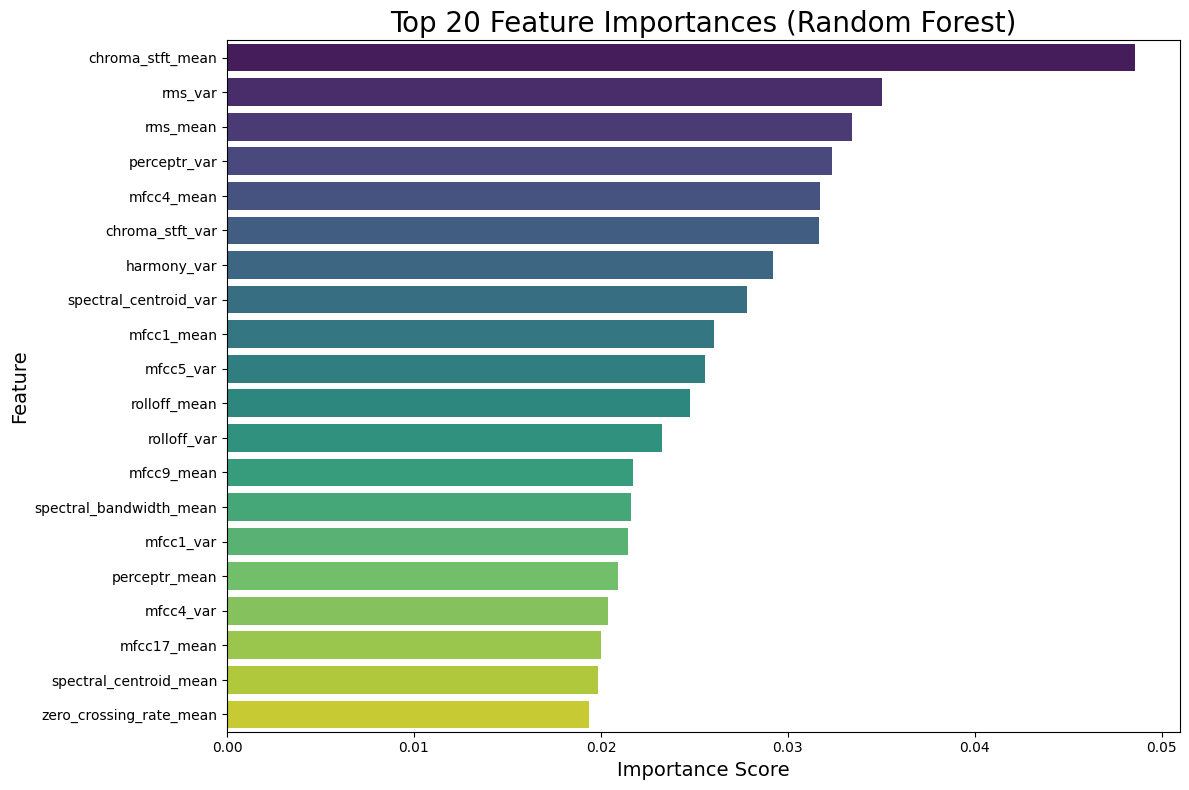

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


importances = best_rf.feature_importances_
feature_names = X_train.columns

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importances = feature_importances.sort_values(by='importance', ascending=False)


top_features = feature_importances.head(20)


plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')
plt.title('Top 20 Feature Importances (Random Forest)', fontsize=20)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()


**LGR**


In [ ]:

df['tempo'] = df['tempo'].apply(lambda x: x[0] if isinstance(x, list) else x)


X = df.drop(columns=['filename', 'label'])
y = df['label']


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


En iyi parametreler: {'C': 1, 'penalty': 'l2'}
En iyi doğruluk skoru: 0.6950000000000001
Test Set Accuracy: 0.685

Classification Report:
               precision    recall  f1-score   support

       blues       0.71      0.60      0.65        20
   classical       0.91      1.00      0.95        20
     country       0.54      0.75      0.62        20
       disco       0.50      0.65      0.57        20
      hiphop       0.64      0.45      0.53        20
        jazz       0.83      0.75      0.79        20
       metal       0.81      0.85      0.83        20
         pop       0.73      0.80      0.76        20
      reggae       0.56      0.45      0.50        20
        rock       0.69      0.55      0.61        20

    accuracy                           0.69       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.69      0.69      0.68       200



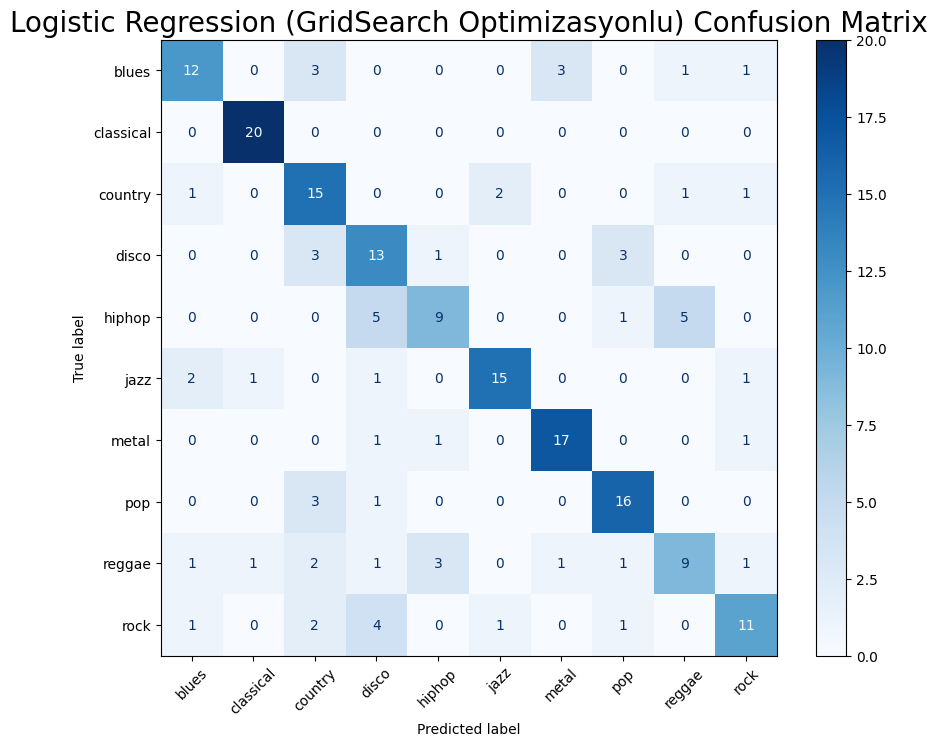

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


logreg = LogisticRegression(max_iter=5000, multi_class='multinomial', solver='saga')


param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)


grid_search.fit(X_train_scaled, y_train)


print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk skoru:", grid_search.best_score_)

best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test_scaled)


print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(best_logreg, X_test_scaled, y_test, cmap='Blues', ax=ax)
plt.title("Logistic Regression (GridSearch Optimizasyonlu) Confusion Matrix", fontsize=20)
plt.xticks(rotation=45)
plt.show()


## **MLP**

# **Wav2Vec2 Finetune**

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

Epoch 1/20:   0%|          | 0/100 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

Epoch 1/20: 100%|██████████| 100/100 [01:44<00:00,  1.04s/it]


✅ Epoch 1 | Loss: 2.2317 | Accuracy: 20.62%


Epoch 2/20: 100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


✅ Epoch 2 | Loss: 1.8871 | Accuracy: 45.62%


Epoch 3/20: 100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


✅ Epoch 3 | Loss: 1.4886 | Accuracy: 54.50%


Epoch 4/20: 100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


✅ Epoch 4 | Loss: 1.2121 | Accuracy: 65.38%


Epoch 5/20: 100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


✅ Epoch 5 | Loss: 1.0391 | Accuracy: 69.88%


Epoch 6/20: 100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


✅ Epoch 6 | Loss: 0.9224 | Accuracy: 71.88%


Epoch 7/20: 100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


✅ Epoch 7 | Loss: 0.7721 | Accuracy: 77.75%


Epoch 8/20: 100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


✅ Epoch 8 | Loss: 0.7166 | Accuracy: 79.00%


Epoch 9/20: 100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


✅ Epoch 9 | Loss: 0.7541 | Accuracy: 76.38%


Epoch 10/20: 100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


✅ Epoch 10 | Loss: 0.6341 | Accuracy: 81.75%


Epoch 11/20: 100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


✅ Epoch 11 | Loss: 0.5933 | Accuracy: 82.88%


Epoch 12/20: 100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


✅ Epoch 12 | Loss: 0.5499 | Accuracy: 83.00%


Epoch 13/20: 100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


✅ Epoch 13 | Loss: 0.5236 | Accuracy: 83.50%


Epoch 14/20: 100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


✅ Epoch 14 | Loss: 0.4872 | Accuracy: 85.88%


Epoch 15/20: 100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


✅ Epoch 15 | Loss: 0.4849 | Accuracy: 86.00%


Epoch 16/20: 100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


✅ Epoch 16 | Loss: 0.4923 | Accuracy: 85.50%


Epoch 17/20: 100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


✅ Epoch 17 | Loss: 0.4584 | Accuracy: 87.88%


Epoch 18/20: 100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


✅ Epoch 18 | Loss: 0.4478 | Accuracy: 87.62%


Epoch 19/20: 100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


✅ Epoch 19 | Loss: 0.3833 | Accuracy: 89.25%


Epoch 20/20: 100%|██████████| 100/100 [01:41<00:00,  1.02s/it]

✅ Epoch 20 | Loss: 0.4291 | Accuracy: 87.88%


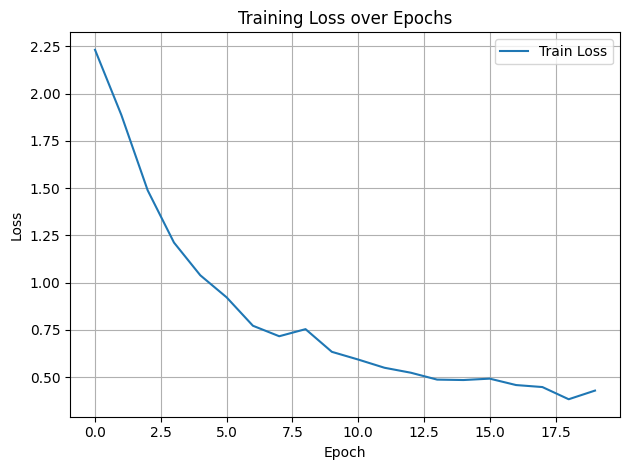


🌟 Final Test Accuracy: 78.50%

📋 Classification Report:
              precision    recall  f1-score   support

       blues       0.81      0.65      0.72        20
   classical       0.87      1.00      0.93        20
     country       0.78      0.90      0.84        20
       disco       0.62      0.65      0.63        20
      hiphop       0.94      0.75      0.83        20
        jazz       1.00      0.90      0.95        20
       metal       0.70      0.95      0.81        20
         pop       0.78      0.90      0.84        20
      reggae       0.65      0.65      0.65        20
        rock       0.77      0.50      0.61        20

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200



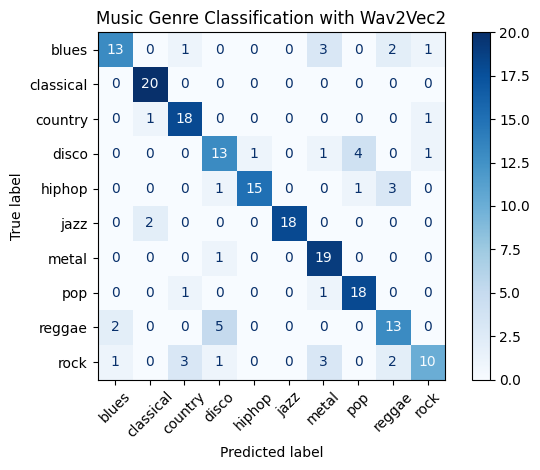

In [ ]:
import os
import torch
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, Subset
from transformers import Wav2Vec2Model, Wav2Vec2Processor
import torch.nn as nn

# Dataset
class GenreDataset(Dataset):
    def __init__(self, base_dir):
        self.data = []
        self.labels = []
        self.genres = sorted(os.listdir(base_dir))
        self.genre_to_idx = {genre: idx for idx, genre in enumerate(self.genres)}
        for genre in self.genres:
            genre_path = os.path.join(base_dir, genre)
            if os.path.isdir(genre_path):
                for file in os.listdir(genre_path):
                    if file.endswith('.wav'):
                        self.data.append(os.path.join(genre_path, file))
                        self.labels.append(self.genre_to_idx[genre])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        wav_path = self.data[idx]
        waveform, sr = torchaudio.load(wav_path)
        waveform = waveform.squeeze(0)
        if sr != 16000:
            waveform = torchaudio.transforms.Resample(sr, 16000)(waveform)
        label = self.labels[idx]
        return waveform.numpy(), label

# Collate function
def collate_fn(batch):
    audio = [item[0] for item in batch]
    inputs = processor(audio, return_tensors="pt", padding=True, sampling_rate=16000, return_attention_mask=True)
    labels = torch.tensor([item[1] for item in batch], dtype=torch.long)
    return {"input_values": inputs.input_values, "attention_mask": inputs.attention_mask, "labels": labels}

# Model
class Wav2Vec2GenreClassifier(nn.Module):
    def __init__(self, base_model, num_labels):
        super().__init__()
        self.wav2vec2 = base_model
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(768, num_labels)

    def forward(self, input_values, attention_mask=None):
        x = self.wav2vec2(input_values, attention_mask=attention_mask).last_hidden_state
        pooled = x.mean(dim=1)
        pooled = self.dropout(pooled)
        return self.classifier(pooled)

# Config
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 8
EPOCHS = 20
LR_ENCODER = 1e-5
LR_CLASSIFIER = 1e-4
WEIGHT_DECAY = 0.05

# Paths
BASE_DIR = "/content/drive/MyDrive/CS552_Project/Data/genres_original"

# Dataset
dataset = GenreDataset(BASE_DIR)
train_idx, test_idx = train_test_split(list(range(len(dataset))), test_size=0.2, random_state=42, stratify=dataset.labels)
train_dataset = Subset(dataset, train_idx)
test_dataset = Subset(dataset, test_idx)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# Load Wav2Vec2
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base")
base_model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base")

model = Wav2Vec2GenreClassifier(base_model, len(dataset.genres)).to(DEVICE)
for p in model.wav2vec2.parameters(): p.requires_grad = False  # Feature extractor donacak
for p in model.wav2vec2.encoder.parameters(): p.requires_grad = True  # Sadece encoder fine-tune
for p in model.classifier.parameters(): p.requires_grad = True

optimizer = torch.optim.Adam([
    {"params": model.wav2vec2.encoder.parameters(), "lr": LR_ENCODER},
    {"params": model.classifier.parameters(), "lr": LR_CLASSIFIER}
], weight_decay=WEIGHT_DECAY)

criterion = nn.CrossEntropyLoss()

# Training
train_losses = []
for epoch in range(EPOCHS):
    model.train()
    t_loss, correct, total = 0, 0, 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        input_values = batch["input_values"].to(DEVICE)
        attention_mask = batch["attention_mask"].to(DEVICE)
        labels = batch["labels"].to(DEVICE)

        optimizer.zero_grad()
        logits = model(input_values, attention_mask)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        t_loss += loss.item()
        preds = logits.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    acc = correct / total
    train_losses.append(t_loss / len(train_loader))
    print(f"✅ Epoch {epoch+1} | Loss: {train_losses[-1]:.4f} | Accuracy: {acc:.2%}")

# Plot Loss
plt.plot(train_losses, label="Train Loss")
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Testing
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        input_values = batch["input_values"].to(DEVICE)
        attention_mask = batch["attention_mask"].to(DEVICE)
        labels = batch["labels"].to(DEVICE)

        logits = model(input_values, attention_mask)
        preds = logits.argmax(dim=1)

        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())

acc = sum([p == l for p, l in zip(all_preds, all_labels)]) / len(all_labels)
print(f"\n🌟 Final Test Accuracy: {acc:.2%}")
print("\n📋 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=dataset.genres))

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.genres)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Music Genre Classification with Wav2Vec2")
plt.tight_layout()
plt.show()


OVR

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


En iyi parametreler: {'C': 1, 'penalty': 'l2'}
En iyi doğruluk skoru: 0.7074999999999999
Test Set Accuracy: 0.655

Classification Report:
               precision    recall  f1-score   support

       blues       0.62      0.65      0.63        20
   classical       0.95      1.00      0.98        20
     country       0.48      0.70      0.57        20
       disco       0.54      0.65      0.59        20
      hiphop       0.67      0.40      0.50        20
        jazz       0.80      0.60      0.69        20
       metal       0.77      0.85      0.81        20
         pop       0.70      0.80      0.74        20
      reggae       0.50      0.50      0.50        20
        rock       0.62      0.40      0.48        20

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.66      0.65       200



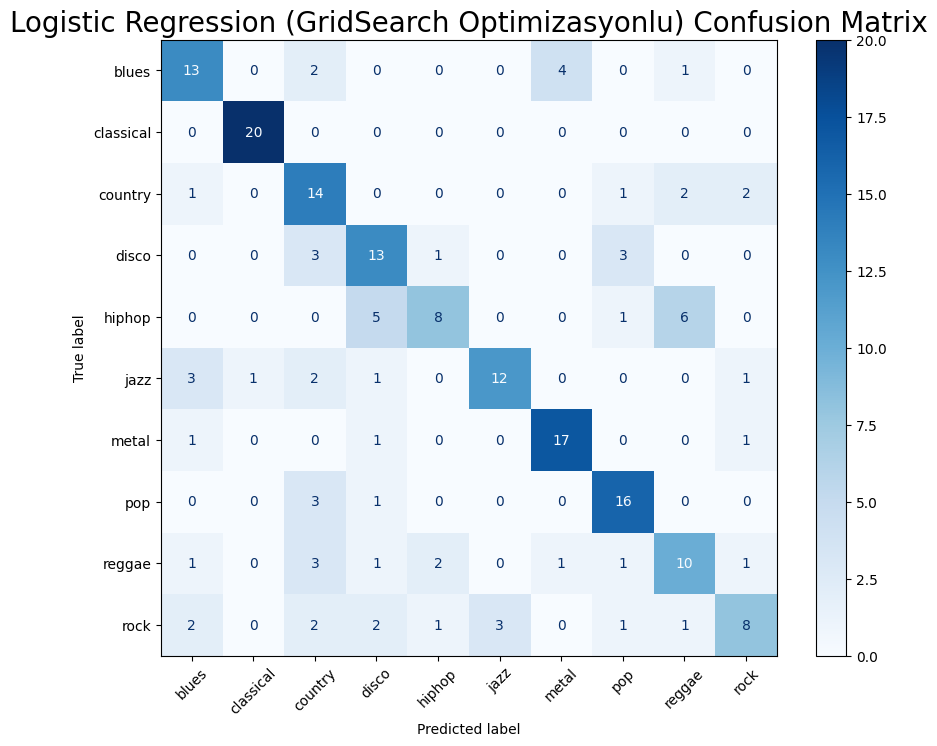

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


logreg = LogisticRegression(max_iter=5000, multi_class='ovr', solver='saga')


param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

# Grid Search CV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)


grid_search.fit(X_train_scaled, y_train)


print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk skoru:", grid_search.best_score_)


best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test_scaled)


print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(best_logreg, X_test_scaled, y_test, cmap='Blues', ax=ax)
plt.title("Logistic Regression (GridSearch Optimizasyonlu) Confusion Matrix", fontsize=20)
plt.xticks(rotation=45)
plt.show()
